# Motivation

&#9708; <span style="color:green"><span style="font-family:Comic Sans MS">**Gradient Ascent Take-Home Assignment-1**</span></span>

&#9708; <span style="color:green"> **Option-I : Business Names**</span>


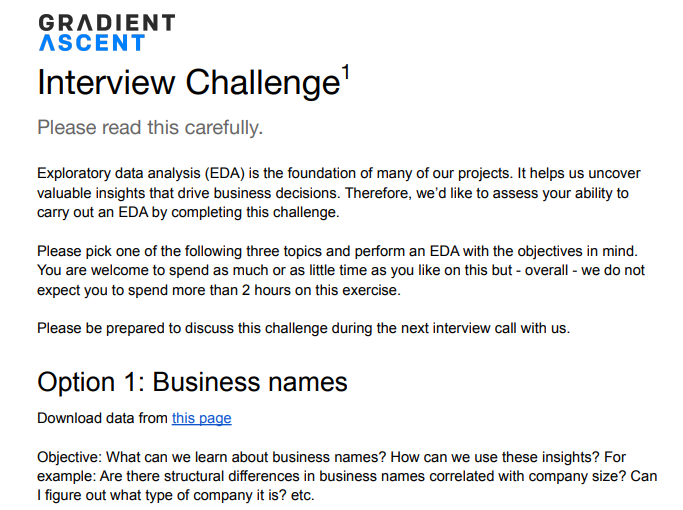

- [x]    Download the data-set from Kaggle
    

- [x]    Pre-Processing : This notebooks entails data cleaning and pre-processing  


- [x]    Save the pre-processed file  

# Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows", 999)

# Utilities 

# Load Data

In [30]:
data = pd.read_csv(
    "C:\\Users\\Zeus\\Downloads\\Road_To_Glory\\2022\\Gradient Ascent\\archive\\companies_sorted.csv"
)
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
display(data.shape)
display(data.head())

(7173426, 10)

,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


# Pre-Processing Exploration 

## Missing Values 

In [5]:
((data.isnull().sum() / data.shape[0]) * 100).loc[lambda x: x > 0.0]

name             0.000042
domain          23.010219
year founded    50.282529
industry         4.042741
locality        34.973874
country         32.748745
dtype: float64

In [6]:
data[data.name.isnull()]

,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
192621,NaN,nan.nl,NaN,apparel & fashion,51 - 200,"rotterdam, zuid-holland, netherlands",netherlands,linkedin.com/company/nan_2,54,61
512291,NaN,nan-tic.com,2010.0,information technology and services,51 - 200,"sabadell, catalonia, spain",spain,linkedin.com/company/nan-tic,18,29
2599907,NaN,NaN,NaN,computer hardware,1 - 10,NaN,NaN,linkedin.com/company/nan,2,2


- We can observe there are considerable quantity of missing values in domain, year, locality and country columns
- Name column has only 3 missing records
    - It seems that 2/3 of them are intentional 
    - Last one seems to be a suspicious company all together 

## Data Types

In [19]:
data.dtypes

name                          object
domain                        object
year founded                 float64
industry                      object
size range                    object
locality                      object
country                       object
linkedin url                  object
current employee estimate      int64
total employee estimate        int64
dtype: object

## Duplicate 

In [20]:
data[data.duplicated()].shape

(0, 10)

## Zer0-Variance 

In [21]:
data.fillna(-999).nunique().loc[lambda x : x>1]

name                         7004635
domain                       5474765
year founded                     235
industry                         149
size range                         8
locality                       96245
country                          237
linkedin url                 7173426
current employee estimate       5379
total employee estimate         8486
dtype: int64

## String Based Columns

### Name 

In [25]:
data[data.name.duplicated()].shape

(168791, 10)

In [26]:
data[data.name.duplicated()].name.head()

120                       kpmg
524    standard chartered bank
597                        ing
599        education nationale
654           procter & gamble
Name: name, dtype: object

In [27]:
data[data.name=='kpmg']

,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
94,kpmg,kpmg.com,1987.0,accounting,10001+,"montvale, new jersey, united states",united states,linkedin.com/company/kpmg,36853,111980
120,kpmg,beaconpartners.com,NaN,financial services,10001+,"new york, new york, united states",united states,linkedin.com/company/kpmg-us,32208,133446
419451,kpmg,NaN,NaN,information technology and services,51 - 200,NaN,NaN,linkedin.com/company/kpmg_3,22,81
546834,kpmg,NaN,NaN,accounting,11 - 50,NaN,NaN,linkedin.com/company/kpmg_6,16,48
1721299,kpmg,NaN,NaN,financial services,11 - 50,NaN,NaN,linkedin.com/company/kpmg_5,4,8
2092097,kpmg,NaN,NaN,banking,1 - 10,NaN,NaN,linkedin.com/company/kpmg-advisory_2,3,19
2252239,kpmg,NaN,NaN,law practice,1 - 10,NaN,NaN,linkedin.com/company/test-company-twogether,3,10
6672019,kpmg,aswainc.com,1972.0,automotive,1 - 10,"summerville, south carolina, united states",united states,linkedin.com/company/aswa-inc,0,2


### locality

In [12]:
data.locality.swifter.apply(lambda x: len(str(x).split(','))).value_counts()

3    4664601
1    2508825
Name: locality, dtype: int64

### country

In [14]:
data.country.swifter.apply(lambda x : len(str(x))).value_counts()

3     2349207
13    2279997
6      620092
14     512348
5      488354
7      333174
11     203684
9      199026
8       89397
12      34013
20      21753
4       21371
10      16406
18       1882
22       1291
19        494
32        380
16        338
24         78
21         77
17         48
15         15
25          1
Name: country, dtype: int64

### Locality & Country

- As I can observe that for most of the localities which have more than 1 comma separated values last element is same as country Hence, for these records I am planning to drop the last record.
- Also, I will be creating a feature which is delta b/w locality and country which i.e. 0 if same else 1 

### LinkedIn-URL

In [10]:
data['linkedin url'].swifter.apply(lambda x : x[21:])[:20]

0                            ibm
1      tata-consultancy-services
2                      accenture
3                        us-army
4                  ernstandyoung
5     hewlett-packard-enterprise
6                      cognizant
7                        walmart
8                      microsoft
9                           at&t
10       united-states-air-force
11                           pwc
12                    wellsfargo
13                       infosys
14                      deloitte
15                          citi
16               bank-of-america
17                jpmorgan-chase
18                       us-navy
19                        amazon
Name: linkedin url, dtype: object

# Processing Data

## Handle Missing Values

``` python 
data.select_dtypes('object').fillna('missing', inplace=True)
data.select_dtypes('float').fillna(-999.0, inplace=True)
```

In [24]:
data['domain'].apply(lambda x : 'missing' if str(x).lower()=='nan' else str(x))

0                               ibm.com
1                               tcs.com
2                         accenture.com
3                            goarmy.com
4                                ey.com
                       ...             
7173421           certiportvouchers.com
7173422              blacktigerclub.com
7173423                         missing
7173424                         missing
7173425    dynamiccontrolssolutions.com
Name: domain, Length: 7173426, dtype: object

In [22]:
data.name.dtype==object

True

In [31]:
for index_ in data.columns:
    if data[index_].dtype == object:
        data[index_] = data[index_].swifter.apply(lambda x: 'missing' if str(
            x).lower() == 'nan' else str(x)).copy(deep=True)
    else:
        data[index_] = data[index_].swifter.apply(lambda x: -999 if str(
            x).lower() == 'nan' else int(x)).copy(deep=True)

In [32]:
data.isnull().sum()

name                         0
domain                       0
year founded                 0
industry                     0
size range                   0
locality                     0
country                      0
linkedin url                 0
current employee estimate    0
total employee estimate      0
dtype: int64

## Data-Type

In [34]:
data.dtypes

name                         object
domain                       object
year founded                  int64
industry                     object
size range                   object
locality                     object
country                      object
linkedin url                 object
current employee estimate     int64
total employee estimate       int64
dtype: object

## URL

``` python
- AS, I can see linkedin.com/company/ is common to all the urls hence, I decided to truncate it from the original url
```

In [33]:
data['linkedin url'] = data['linkedin url'].swifter.apply(
    lambda x: x[21:]).copy(deep=True)

# Write Processed Data --> Disk

In [35]:
data.to_feather(
    "C:\\Users\\Zeus\\Downloads\\Road_To_Glory\\2022\\Gradient Ascent\\archive\\business_name_processed.feather"
)